# A python script to sum flux from FITS image and output as figure

## importing packages

In [156]:
%matplotlib inline

import os
import sys
sys.path.append('./')

import math
import numpy as np
from numpy import size

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
matplotlib.use('PDF')

from astropy.io import fits
from astropy.io.fits import getdata

/scratch/home/hlu/astronomical_softwares/python/anaconda3/envs/learningPython3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Setting parameters

### Creating dictionaries for parameters and data

In [157]:
# DO NOT EDIT THIS BLOCK
FITSpath_dict      = {}  # directories for FITS images
asciiname_dict     = {}  # output ascii filenames
outfig_dict        = {}  # output figure filenames
fluxdata_dict      = {}  # array of summed flux
frequencydata_dict = {}  # array of frequency
inclin_dict        = {}  # array of inclination angle

### After running this script, data can be accessed by typing, for example
print ( fluxdata_dict['sim1'] )

print ( frequencydata_dict['sim1'] )

In [158]:
# data to process
data_to_process = [
                   'sim1',
                   'sim2'
                  ]

# Define data path and output figure names for each set of simulations
sim_id = 'sim1'
FITSpath_dict[sim_id]  = './FITS1/'
outfig_dict[sim_id]    = sim_id + '.pdf'
asciiname_dict[sim_id] = sim_id + '.txt'

sim_id = 'sim2'
FITSpath_dict[sim_id] = './FITS2/'
outfig_dict[sim_id]   = sim_id + '.pdf'
asciiname_dict[sim_id] = sim_id + '.txt'

# keywords adapting to specific systems of FITS headers
freqheaditem = 'restfrq'

## Steps to execute

In [159]:
# Steps to execute
mysteps = [0, 1, 2]

## Defining flows

In [160]:
thesteps = []
step_title = {
              0: 'Collect file names and sum fluxes',
              1: 'ascii output',
              2: 'Generating figures and output PDF',
             }

try:
  print ('List of steps to be executed ...', mysteps)
  thesteps = mysteps
except:
  print ('global variable mysteps not set.')
if (thesteps==[]):
  thesteps = range(0,len(step_title))
  print ('Executing all steps: ', thesteps)


# Not actually producing images in debug mode -------------------
debug = True


List of steps to be executed ... [0, 1, 2]


### Collecting FITS files and sum fluxes from them.
#### There is no true information about inclination collected yet

In [161]:
# collecting FITS filenames
mystep = 0

if(mystep in thesteps):
  print ('Step ', mystep, step_title[mystep])
  print ('\n')

  # iterating over individual simulation data to process
  for data in data_to_process:

    print ( 'Data to process: ', data )
    FITSpath  = FITSpath_dict[data]
    FITSs     = os.listdir( FITSpath )
    fluxdata_dict[data]      = []
    frequencydata_dict[data] = []
    inclin_dict[data]        = []

    # iterating over individual FITS image under each simulation
    for FITS_id in range( len(FITSs) ):
       print ( 'FITS image name :', FITSs[FITS_id] )
    
       # open FITS image
       # reading header information
       hdulist = fits.open( FITSpath + FITSs[FITS_id] )

       # obtain header parameter
       naxis1    = hdulist[0].header['naxis1']
       naxis2    = hdulist[0].header['naxis2']
       bunit     = hdulist[0].header['bunit']
       frequency = hdulist[0].header[freqheaditem]
       hdulist.close()
    
       # make sure that the flux unit is 'Jy/pixel'
       print ( 'Pixel brightness unit :', bunit )
        
        
       # Loading FITS images
       rawimage, hd     = getdata(
                                  FITSpath + FITSs[FITS_id], 
                                  header=True
                                 )
       image = rawimage[:][:][0][0]
       flux  = np.nansum( image )
    
       # append the flux measurements to the data array
       fluxdata_dict[data].append( flux  )
       frequencydata_dict[data].append( frequency )    
       inclin_dict[data].append( 0.0 )
       
    
    print( '*Results:\n',
              'flux:', fluxdata_dict[data], '\n',  
              'frequency:', frequencydata_dict[data], '\n'
              'inclination:', inclin_dict[data]
            )
        
    print ( '\n')

Step  0 Collect file names and sum fluxes


Data to process:  sim1
FITS image name : g33p92.3p.rob2.image.fits
Pixel brightness unit : Jy/beam
FITS image name : g33p92.3p.rob0.image.fits
Pixel brightness unit : Jy/beam
*Results:
 flux: [27.143118, 34.097103] 
 frequency: [231220690000.0, 231220690000.0] 
inclination: [0.0, 0.0]


Data to process:  sim2
FITS image name : g33p92.3p.rob2.image.pbcor.fits
Pixel brightness unit : Jy/beam
FITS image name : g33p92.3p.rob0.image.pbcor.fits
Pixel brightness unit : Jy/beam
*Results:
 flux: [-745.03455, -229.60609] 
 frequency: [231220690000.0, 231220690000.0] 
inclination: [0.0, 0.0]




### Generating ascii output. Columns are: frequency (Hz), flux (Jy), inclination (deg)

In [162]:
# ascii output
mystep = 1

if(mystep in thesteps):
  print ('Step ', mystep, step_title[mystep])
  print ('\n')

  # iterating over individual simulation data to process
  for data in data_to_process:
        
        file = open(asciiname_dict[data], "w")
        file.write("# Freq_Hz Flux_Jy Inclination_deg \n" )
        
        for data_id in range( size(frequencydata_dict[data]) ):
            outstring = str( frequencydata_dict[data][data_id] ) + ' ' \
                      + str( fluxdata_dict[data][data_id]      ) + ' ' \
                      + str( inclin_dict[data][data_id]        ) + '\n'
            file.write(outstring)
        
        file.close()

Step  1 ascii output




### Generating figures and output in PDF

Step  2 Generating figures and output PDF




/scratch/home/hlu/astronomical_softwares/python/anaconda3/envs/learningPython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


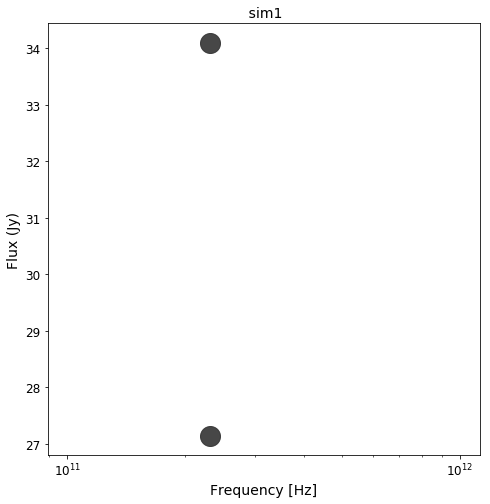

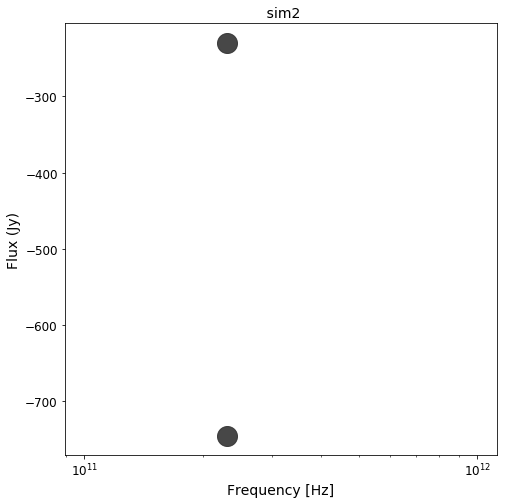

In [163]:
# PDF output
mystep = 2

if(mystep in thesteps):
  print ('Step ', mystep, step_title[mystep])
  print ('\n')

  # iterating over individual simulation data to process
  for data in data_to_process:
        
  ###### Initializing Figure #############################
    fig = plt.figure(
                     figsize = (8, 8)
                     )
    ax0 = fig.add_axes([0.12, 0.1, 0.75, 0.75])

    # Set the x/y axis title and legend
    plt.xlabel('Frequency [Hz]', size = 14.0)
    plt.ylabel('Flux (Jy)',      size = 14.0)
    plt.title(' %s' %( data ), \
                                 size = 14.0
                                            )
    plt.xscale('log')
    plt.legend(loc=4, fontsize=12)


    # Ajusting formats
    SMALL_SIZE = 12
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 30

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

    freq = np.array(frequencydata_dict[data])
    flux = np.array(fluxdata_dict[data])
    
    plt.plot( 
             freq, 
             flux,
             'o',
             markersize = 20,
             color = (0.2, 0.2, 0.2, 0.9)
             )
    
    plt.savefig(outfig_dict[data], 
                transparent = True
                )